## Logistic Regression (Regressión Logística)

La regresión logística es una técnica estadística y de machine learning que se utiliza para clasificar datos, mientras que las regresiones lineales buscan predecir una variable continua **la regresión logística se enfoca en predecir la clase de una variable categórica.**

Por lo tanto forma parte de los modelos de clasificación. Es sencillo de implementar, tiene buen rendimiento cuando las clases son linealmente separables, trabaja mejor con clases binarias y es un modelo probabilístico. 

**La regresión logística mide la probabilidad de que un patrón pertenezca a una clase u otra.**

### Función Logística (Sigmoid)

La función logística, también conocida como **función sigmoidal** (o Sigmoid en inglés) es la función que le da nombre a este clasificador.

Ésta función se define de la siguiente forma:

$$sigmoid(x) = \frac{1}{1 + e^{-x}}$$

Otra forma de definir la función:

$$sigmoid(x) = \frac{e^{x}}{e^{x} + 1}$$

Gráfica de la función sigmoidal:
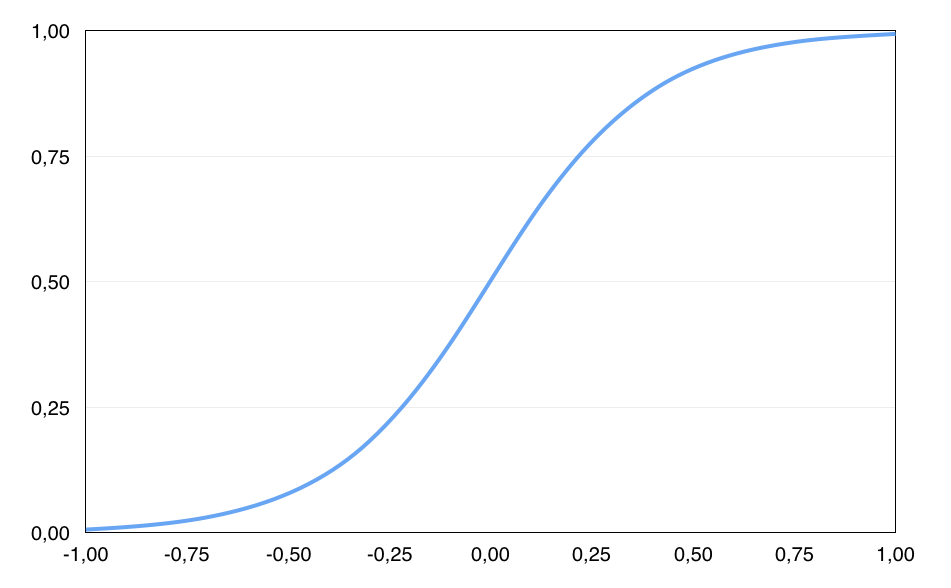


**La función sigmoidal mostrada arriba es la que se usaría si tuviésemos un modelo de una sola característica (atributo).**

Para **modelos multilíneales** el valor de **$x$ será sustituido por una función que se ajuste mejor a los datos de entrenamiento**, dando de esta forma una **variante de la función sigmoidal**, en otras palabras, estaríamos hablando de una función sigmoidal donde **$x$ pasa a ser una función de n-variables (una por cada atributo o columna)**, similar a lo que sucede con las **Regresiones Lineales**.

Para estos casos, la función sigmoidal sería: 

$$sigmoid(x) = \frac{1}{1 + e^{-(w_{0}*x_{0} + w_{1}*x_{1}+...+w_{n})}}$$



**$x$ pasa a ser una ecuación lineal resultado de una regresión lineal que se ajusta lo mejor posible a los datos.**

- El **dominio de esta función son todos los números reales** y el rango o **codominio son los valores entre 0 y 1**, sin incluirlos, es decir, **nunca llegan a ser 0 o 1**.


- La idea detrás de este clasificador es **"transformar"** cada instancia del conjunto de entrenamiento **usando la función sigmoidal**, dando como **resultado un número entre 0 y 1**. Dependiendo del resultado, el clasificador asignará una clase a cada instancia. **Si el resultado es < 0.5 el clasificador lo asignará a la clase 0, si el resultado es > 0.5 el clasificador lo asignará a la clase 1**.


- **La regresión logística es un algoritmo lineal** (con una transformación no lineal en la salida). **Asume una relación lineal entre las variables de entrada con la salida.** Las transformaciones de datos de sus variables de entrada que exponen mejor esta relación lineal pueden dar como **resultado un modelo más preciso**. Por ejemplo, puede usar **log, sqrt, Box-Cox y otras transformaciones** univariadas para exponer mejor esta relación.


- **El modelo puede sobreajustarse (overfitting)** si tiene varias características (atributos) altamente correlacionados. Podemos considerar eliminar las características (atributos) altamente correlacionadas.


- **Es posible que el proceso de estimación de probabilidad esperada que aprende los coeficientes no converja**. Esto puede suceder si hay muchas características altamente correlacionadas o tenemos una matriz **"sparse"** (una matriz con muchos ceros).


_**Documentación:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html_

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

# Normalizacion
from sklearn.preprocessing import MinMaxScaler

# Train, Test
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Modelo
from sklearn.linear_model import LogisticRegression

In [2]:
iris = datasets.load_iris()
X = iris.data[:100, :2]
y = iris.target[:100]

# En esta ocasión vamos a quedarnos con las primeras 2 clases

In [3]:
X.shape, y.shape

((100, 2), (100,))

### Procesamiento

In [4]:
# Normalización de datos

x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)

X

array([[0.2962963 , 0.625     ],
       [0.22222222, 0.41666667],
       [0.14814815, 0.5       ],
       [0.11111111, 0.45833333],
       [0.25925926, 0.66666667],
       [0.40740741, 0.79166667],
       [0.11111111, 0.58333333],
       [0.25925926, 0.58333333],
       [0.03703704, 0.375     ],
       [0.22222222, 0.45833333],
       [0.40740741, 0.70833333],
       [0.18518519, 0.58333333],
       [0.18518519, 0.41666667],
       [0.        , 0.41666667],
       [0.55555556, 0.83333333],
       [0.51851852, 1.        ],
       [0.40740741, 0.79166667],
       [0.2962963 , 0.625     ],
       [0.51851852, 0.75      ],
       [0.2962963 , 0.75      ],
       [0.40740741, 0.58333333],
       [0.2962963 , 0.70833333],
       [0.11111111, 0.66666667],
       [0.2962963 , 0.54166667],
       [0.18518519, 0.58333333],
       [0.25925926, 0.41666667],
       [0.25925926, 0.58333333],
       [0.33333333, 0.625     ],
       [0.33333333, 0.58333333],
       [0.14814815, 0.5       ],
       [0.

### Train, Test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (70, 2), y_train: (70,)
X_test: (30, 2),  y_test: (30,)


### Modelo

In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Predicciones

In [7]:
yhat = model.predict(X_test)

yhat

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1])

In [8]:
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 1.0
Accuracy: 1.0
Precisión: 1.0
Sensibilidad: 1.0
F1-score: 1.0


### Confusion Matrix

In [9]:
confusion_matrix(y_test, yhat)

array([[17,  0],
       [ 0, 13]], dtype=int64)

### Classification Report

In [10]:
print(classification_report(y_test, yhat, digits = 3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        17
           1      1.000     1.000     1.000        13

    accuracy                          1.000        30
   macro avg      1.000     1.000     1.000        30
weighted avg      1.000     1.000     1.000        30



### Métodos y Atributos del Modelo

In [11]:
# .predict_proba()

model.predict_proba(X_test)

array([[0.24371714, 0.75628286],
       [0.27259765, 0.72740235],
       [0.38006402, 0.61993598],
       [0.63677249, 0.36322751],
       [0.74319439, 0.25680561],
       [0.65473469, 0.34526531],
       [0.80610904, 0.19389096],
       [0.29404834, 0.70595166],
       [0.64857255, 0.35142745],
       [0.67821861, 0.32178139],
       [0.5924888 , 0.4075112 ],
       [0.66084528, 0.33915472],
       [0.24205315, 0.75794685],
       [0.73622572, 0.26377428],
       [0.3397425 , 0.6602575 ],
       [0.72432283, 0.27567717],
       [0.12514778, 0.87485222],
       [0.16541599, 0.83458401],
       [0.63677249, 0.36322751],
       [0.57339826, 0.42660174],
       [0.33569474, 0.66430526],
       [0.41181924, 0.58818076],
       [0.68019021, 0.31980979],
       [0.77410899, 0.22589101],
       [0.29217347, 0.70782653],
       [0.73269622, 0.26730378],
       [0.70272884, 0.29727116],
       [0.3596556 , 0.6403444 ],
       [0.63467698, 0.36532302],
       [0.15604495, 0.84395505]])

### Recta que separa las nubes de puntos

In [12]:
# Ecuación de la recta definida por el modelo

print("RECTA")

print(f"\tCoeficientes: {model.coef_[0]}")

print(f"\tIntercepción: {model.intercept_[0]}")

ecuacion = " ".join(([f"+{coef}*w{num}" if coef >= 0 else f"{coef}*w{num}"\
                      for num, coef in enumerate(np.round(model.coef_[0], 3))]\
                     + [str(np.round(model.intercept_[0], 3))]))

print(f"\tEcuación: {ecuacion}")

print("*"*100)

print("FUNCION SIGMOID")

print(f"\t1 / (1 + e**-({ecuacion}))")

RECTA
	Coeficientes: [ 3.09768585 -2.53632744]
	Intercepción: -0.0782254595264429
	Ecuación: +3.098*w0 -2.536*w1 -0.078
****************************************************************************************************
FUNCION SIGMOID
	1 / (1 + e**-(+3.098*w0 -2.536*w1 -0.078))


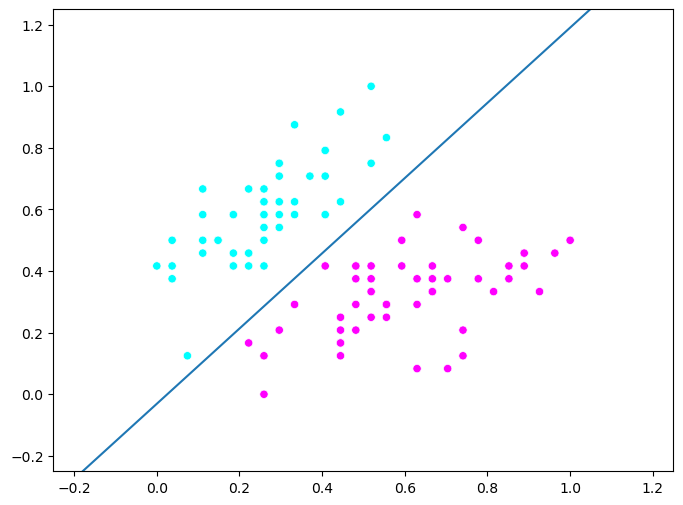

In [13]:
# Gráfico

plt.figure(figsize = (8, 6))

# Puntos de las primera 2 clases
sns.scatterplot(x = X[:, 0], y = X[:, 1], c = y, cmap = "cool")

# Recta
x_linspace = np.linspace(-0.25, 1.25, 100)
recta = (model.coef_[0][0]*x_linspace + model.intercept_[0])/(-model.coef_[0][1])

plt.plot(x_linspace, recta)

plt.xlim(-0.25, 1.25)
plt.ylim(-0.25, 1.25)

plt.show()

### Representación de yhat y la función Sigmoid

In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_regression(coef_, intercept_, x):
    recta = np.dot(coef_, x) + intercept_
    
    return sigmoid(recta)

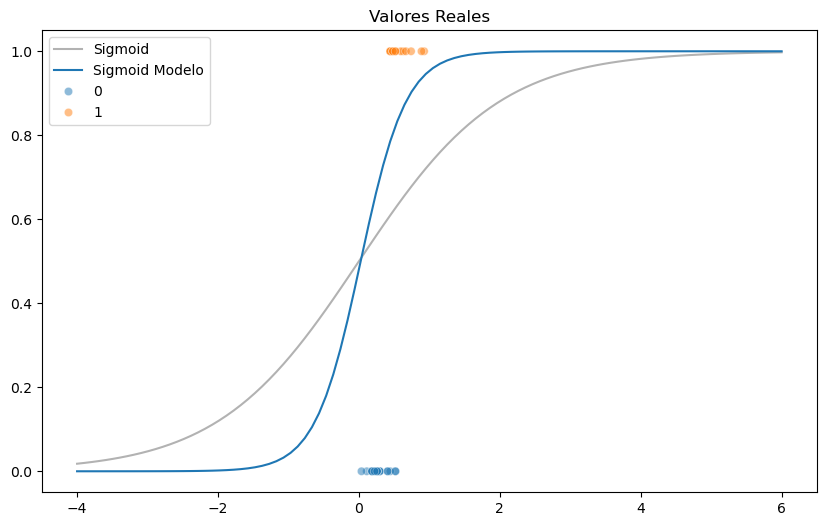

In [20]:
plt.figure(figsize = (10, 6))

x_linspace = np.linspace(-4, 6, 100)
curva_sigmoid = sigmoid_regression(model.coef_[0][0], model.intercept_[0], x_linspace)

# Curva Sigmoid Original
plt.plot(x_linspace, sigmoid(x_linspace), color = "black", alpha = 0.3, label = "Sigmoid")

# Curva Sigmoid de la regression
plt.plot(x_linspace, curva_sigmoid, label = "Sigmoid Modelo")

# Puntos de X_test & y_test
sns.scatterplot(x = X_test[:,0], y = y_test, hue = y_test, alpha = 0.5)

plt.title("Valores Reales")
plt.legend()
plt.show()

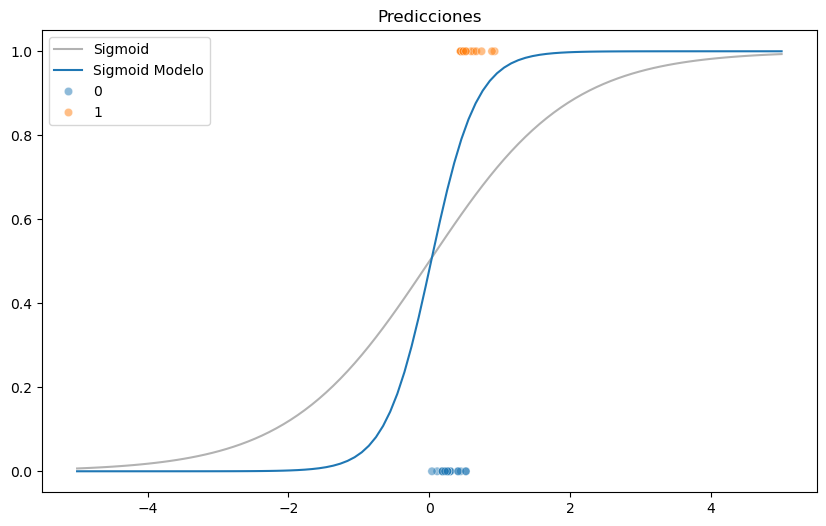

In [24]:
plt.figure(figsize = (10, 6))

x_linspace = np.linspace(-5, 5, 100)
curva_sigmoid = sigmoid_regression(model.coef_[0][0], model.intercept_[0], x_linspace)

# Curva Sigmoid Original
plt.plot(x_linspace, sigmoid(x_linspace), color = "black", alpha = 0.3, label = "Sigmoid")

# Curva Sigmoid de la regression
plt.plot(x_linspace, curva_sigmoid, label = "Sigmoid Modelo")

# Puntos de X_test & y_test
sns.scatterplot(x = X_test[:,0], y = yhat, hue = yhat, color = "orange", alpha = 0.5)

plt.title("Predicciones")
plt.legend()
plt.show()

In [ ]:
################################################################################################################################

### Ejercicio 1:
- Utiliza el dataset del titanic para practicar **`LogisticRegression`**:

### **LIBRERÍAS**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from plotly.graph_objects import go

# Train, Test
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Modelo
from sklearn.linear_model import LogisticRegression

### **ENTRENAMIENTO Y PREDICCIÓN**

In [2]:
df = pd.read_csv("../Data/titanicana.csv")

In [3]:
df[df['Name'].str.contains("Futrelle")]

,PassengerId,Name,Sex,Age,Survived,Pclass,Ticket,Fare,Surname,Apellidos,Title
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,1,113803,53.1,Futrelle,2,3
137,138,"Futrelle, Mr. Jacques Heath",1,37.0,0,1,113803,53.1,Futrelle,2,2


In [40]:
df["Title"].unique()

array([2, 3, 1, 0, 4], dtype=int64)

In [6]:
X = np.array(df[['Sex', 'Age', 'Pclass', 'Fare', 'Apellidos', 'Title']])
y = np.array(df["Survived"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (623, 6), y_train: (623,)
X_test: (268, 6),  y_test: (268,)


In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)
yhat = model.predict(X_test)

In [8]:
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 0.6484962406015038
Accuracy: 0.7947761194029851
Precisión: 0.7917857142857143
Sensibilidad: 0.7812876570838354
F1-score: 0.785052861830113


### **Recta que separa la nube de puntos**

In [44]:
print("RECTA")

print(f"\tCoeficientes: {model.coef_[0]}")

print(f"\tIntercepción: {model.intercept_[0]}")

ecuacion = " ".join(([f"+{coef}*w{num}" if coef >= 0 else f"{coef}*w{num}"\
                      for num, coef in enumerate(np.round(model.coef_[0], 3))]\
                     + [str(np.round(model.intercept_[0], 3))]))

print(f"\tEcuación: {ecuacion}")

print("*"*100)

print("FUNCION SIGMOID")

print(f"\t1 / (1 + e**-({ecuacion}))")

RECTA
	Coeficientes: [-2.44013430e+00 -2.84231523e-02 -9.59504133e-01  2.19930471e-03
 -2.24104158e-01 -9.39393378e-02]
	Intercepción: 4.465443832497093
	Ecuación: -2.44*w0 -0.028*w1 -0.96*w2 +0.002*w3 -0.224*w4 -0.094*w5 4.465
****************************************************************************************************
FUNCION SIGMOID
	1 / (1 + e**-(-2.44*w0 -0.028*w1 -0.96*w2 +0.002*w3 -0.224*w4 -0.094*w5 4.465))


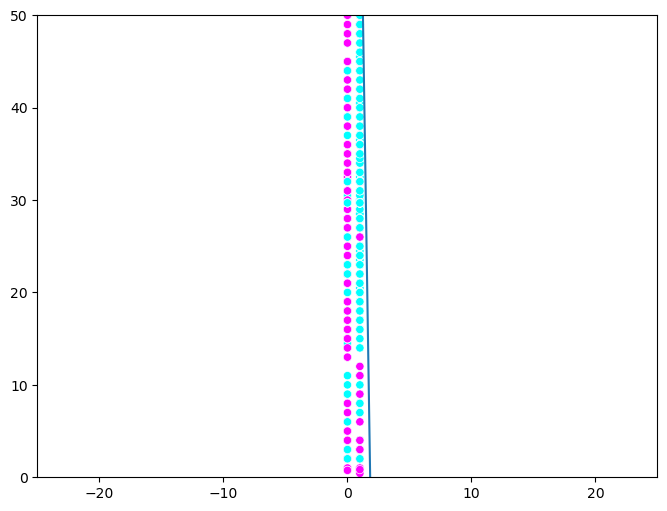

In [9]:
# Gráfico de los datos de las clases que va hacer

plt.figure(figsize = (8, 6))

# Puntos de las primera 2 clases   (columna 1, columna2)
sns.scatterplot(x = X[:, 0], y = X[:, 1], c = y, cmap = "cool")

# Recta                 (rango de los datos de x, puede ser que tengamos que poner otro rango que corresponda en mis datos)
x_linspace = np.linspace(-500, 500, 100)
recta = (model.coef_[0][0]*x_linspace + model.intercept_[0])/(-model.coef_[0][1])

plt.plot(x_linspace, recta)

plt.xlim(-25, 25)
plt.ylim(0, 50)

plt.show()

### **Representación del y_test y la recta Sigmoidal**

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_regression(coef_, intercept_, x):
    recta = np.dot(coef_, x) + intercept_
    
    return sigmoid(recta)

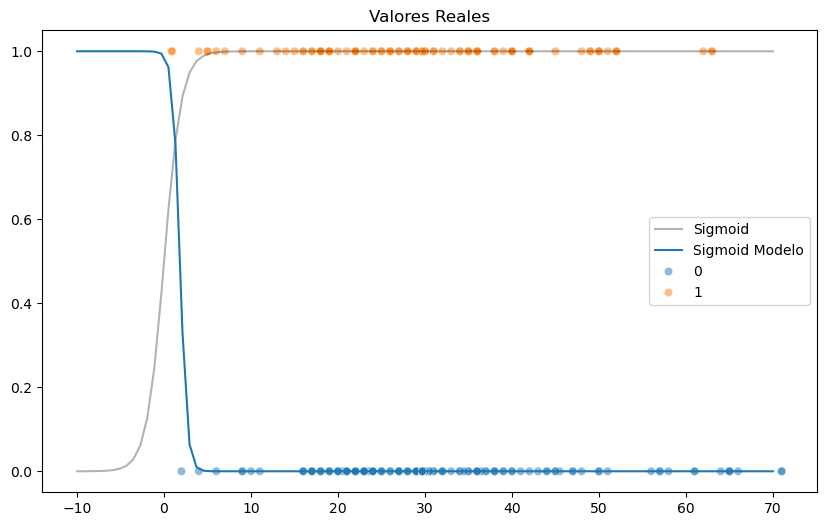

In [11]:
plt.figure(figsize = (10, 6))

x_linspace = np.linspace(-10, 70, 100)
curva_sigmoid = sigmoid_regression(model.coef_[0][0], model.intercept_[0], x_linspace)

# Curva Sigmoid Original
plt.plot(x_linspace, sigmoid(x_linspace), color = "black", alpha = 0.3, label = "Sigmoid")

# Curva Sigmoid de la regression
plt.plot(x_linspace, curva_sigmoid, label = "Sigmoid Modelo")

# Puntos de X_test & y_test
sns.scatterplot(x = X_test[:,1], y = y_test, hue= y_test, alpha = 0.5)

plt.title("Valores Reales")
plt.legend()
plt.show()

### **Representación del y_hat y la recta sigmoidal**

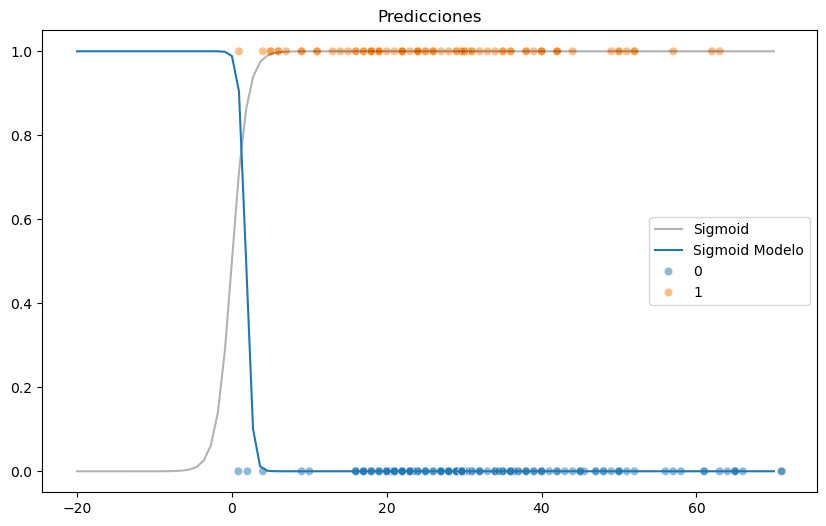

In [12]:
plt.figure(figsize = (10, 6))

x_linspace = np.linspace(-20, 70, 100)
curva_sigmoid = sigmoid_regression(model.coef_[0][0], model.intercept_[0], x_linspace)

# Curva Sigmoid Original
plt.plot(x_linspace, sigmoid(x_linspace), color = "black", alpha = 0.3, label = "Sigmoid")

# Curva Sigmoid de la regression
plt.plot(x_linspace, curva_sigmoid, label = "Sigmoid Modelo")

# Puntos de X_test & y_test
sns.scatterplot(x = X_test[:,1], y = yhat, hue= yhat, color = "orange", alpha = 0.5)

plt.title("Predicciones")
plt.legend()
plt.show()

### **Normalizando datos**

In [10]:
scaler_x = MinMaxScaler()
scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)

# Normalizacion de y_train
scaler_y = MinMaxScaler()
scaler_y.fit(y_train.reshape(-1, 1)) # .reshape(-1, 1) se utiliza para transformar un vector a una matriz
y_train = scaler_y.transform(y_train.reshape(-1,1))

# Normalizacion de X_test
#scaler_x.fit(X_test)
X_test = scaler_x.transform(X_test)

# Normalizacion de y_test
#scaler_y.fit(y_test.reshape(-1, 1)) # .reshape(-1, 1) se utiliza para transformar un vector a una matriz
y_test = scaler_y.transform(y_test.reshape(-1,1))

print(f"Conjunto de Train: {X_train.shape, y_train.shape}")
print(f"Conjunto de Test: {X_test.shape, y_test.shape}")

Conjunto de Train: ((623, 6), (623, 1))
Conjunto de Test: ((268, 6), (268, 1))


In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)
yhat = model.predict(X_test)

print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

print("RECTA")

print(f"\tCoeficientes: {model.coef_[0]}")

print(f"\tIntercepción: {model.intercept_[0]}")

ecuacion = " ".join(([f"+{coef}*w{num}" if coef >= 0 else f"{coef}*w{num}"\
                      for num, coef in enumerate(np.round(model.coef_[0], 3))]\
                     + [str(np.round(model.intercept_[0], 3))]))

print(f"\tEcuación: {ecuacion}")

print("*"*100)

print("FUNCION SIGMOID")

print(f"\t1 / (1 + e**-({ecuacion}))")

Jaccard Index: 0.6631578947368422
Accuracy: 0.8059701492537313
Precisión: 0.8055706275999277
Sensibilidad: 0.790841797211224
F1-score: 0.7957317073170731
RECTA
	Coeficientes: [-2.42301903 -1.42596272 -1.79167775  0.55309905 -0.35906576 -0.50360858]
	Intercepción: 2.947214263452333
	Ecuación: -2.423*w0 -1.426*w1 -1.792*w2 +0.553*w3 -0.359*w4 -0.504*w5 2.947
****************************************************************************************************
FUNCION SIGMOID
	1 / (1 + e**-(-2.423*w0 -1.426*w1 -1.792*w2 +0.553*w3 -0.359*w4 -0.504*w5 2.947))


C:\Users\Ane Zubieta\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


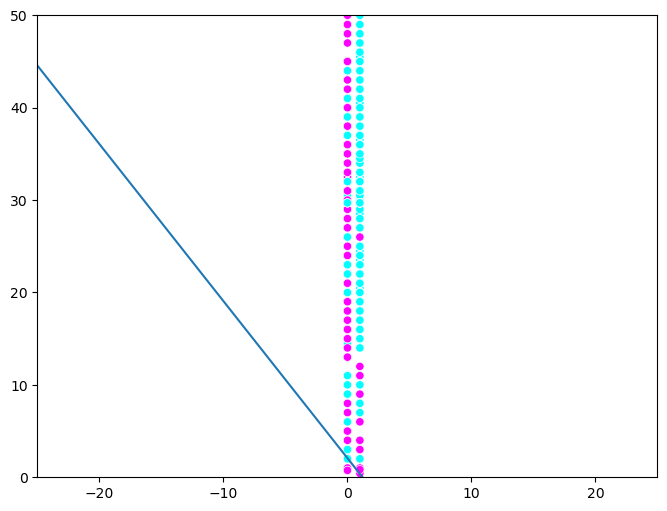

In [15]:
# Gráfico de los datos de las clases que va hacer

plt.figure(figsize = (8, 6))

# Puntos de las primera 2 clases   (columna 1, columna2)
sns.scatterplot(x = X[:, 0], y = X[:, 1], c = y, cmap = "cool")

# Recta                 (rango de los datos de x, puede ser que tengamos que poner otro rango que corresponda en mis datos)
x_linspace = np.linspace(-500, 500, 100)
recta = (model.coef_[0][0]*x_linspace + model.intercept_[0])/(-model.coef_[0][1])

plt.plot(x_linspace, recta)

plt.xlim(-25, 25)
plt.ylim(0, 50)

plt.show()

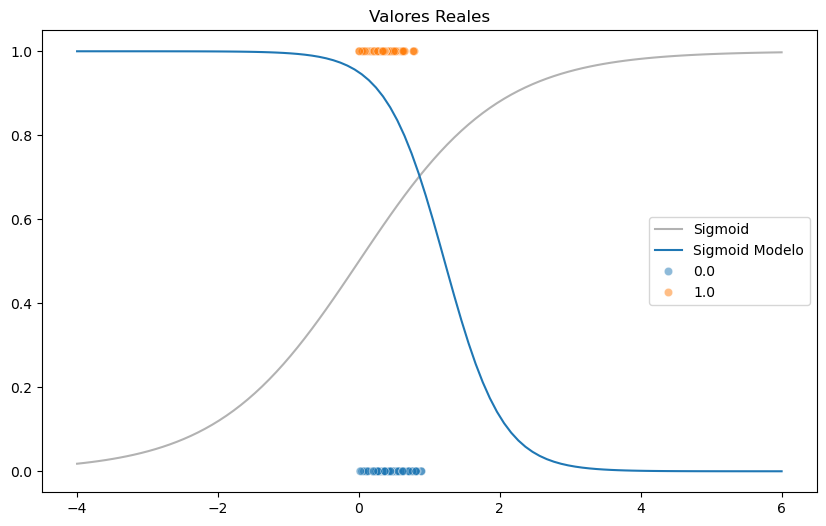

In [16]:
plt.figure(figsize = (10, 6))

x_linspace = np.linspace(-4, 6, 100)
curva_sigmoid = sigmoid_regression(model.coef_[0][0], model.intercept_[0], x_linspace)

# Curva Sigmoid Original
plt.plot(x_linspace, sigmoid(x_linspace), color = "black", alpha = 0.3, label = "Sigmoid")

# Curva Sigmoid de la regression
plt.plot(x_linspace, curva_sigmoid, label = "Sigmoid Modelo")

# Puntos de X_test & y_test
sns.scatterplot(x = X_test[:, 1], y = y_test.flatten(), hue= y_test.flatten(), alpha = 0.5)

plt.title("Valores Reales")
plt.legend()
plt.show()

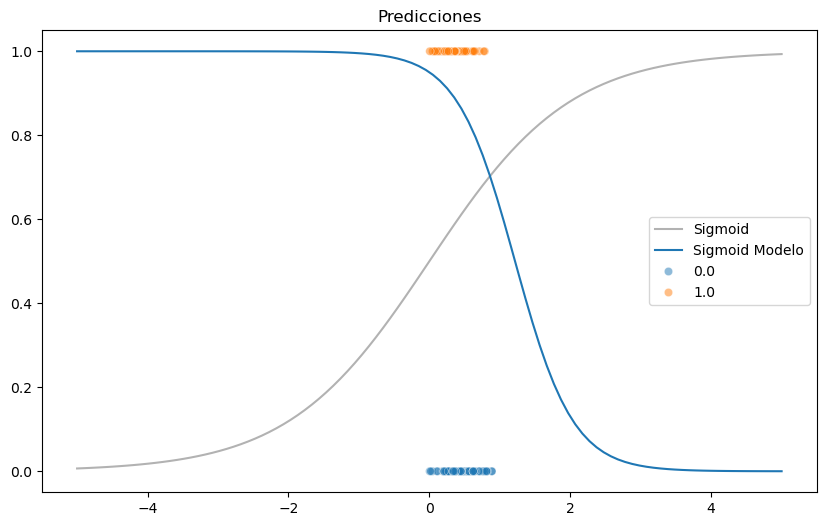

In [17]:
plt.figure(figsize = (10, 6))

x_linspace = np.linspace(-5, 5, 100)
curva_sigmoid = sigmoid_regression(model.coef_[0][0], model.intercept_[0], x_linspace)

# Curva Sigmoid Original
plt.plot(x_linspace, sigmoid(x_linspace), color = "black", alpha = 0.3, label = "Sigmoid")

# Curva Sigmoid de la regression
plt.plot(x_linspace, curva_sigmoid, label = "Sigmoid Modelo")

# Puntos de X_test & y_test
sns.scatterplot(x = X_test[:, 1], y = yhat, hue= yhat, color = "orange", alpha = 0.5)

plt.title("Predicciones")
plt.legend()
plt.show()

In [13]:
colors = []
for i in range(len(yhat)):
  if yhat[i] == 0:
    colors.append('red')
  else:
    colors.append('blue')

In [47]:
len(colors)

268

In [53]:
x_linspace = np.linspace(-5, 5, 100)
curva_sigmoid = sigmoid_regression(model.coef_[0][0], model.intercept_[0], x_linspace)
fig = px.scatter_3d(x          = X_test[:,0],
              y          = X_test[:,1],
              z          = yhat,
              color      = colors)
# Create scatter plot for the sigmoid curve
sigmoidal_line = go.Scatter3d(
    x=x_linspace,
    y=curva_sigmoid,
    z=np.zeros(len(curva_sigmoid)),
    mode='lines',
    line=dict(color='black', width=2),
)

# Add the sigmoid curve to the figure
fig.add_trace(sigmoidal_line)
fig.show()

TypeError: line() got an unexpected keyword argument 'line_width'